In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('http://taanila.fi/winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


C:\Users\aaros\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


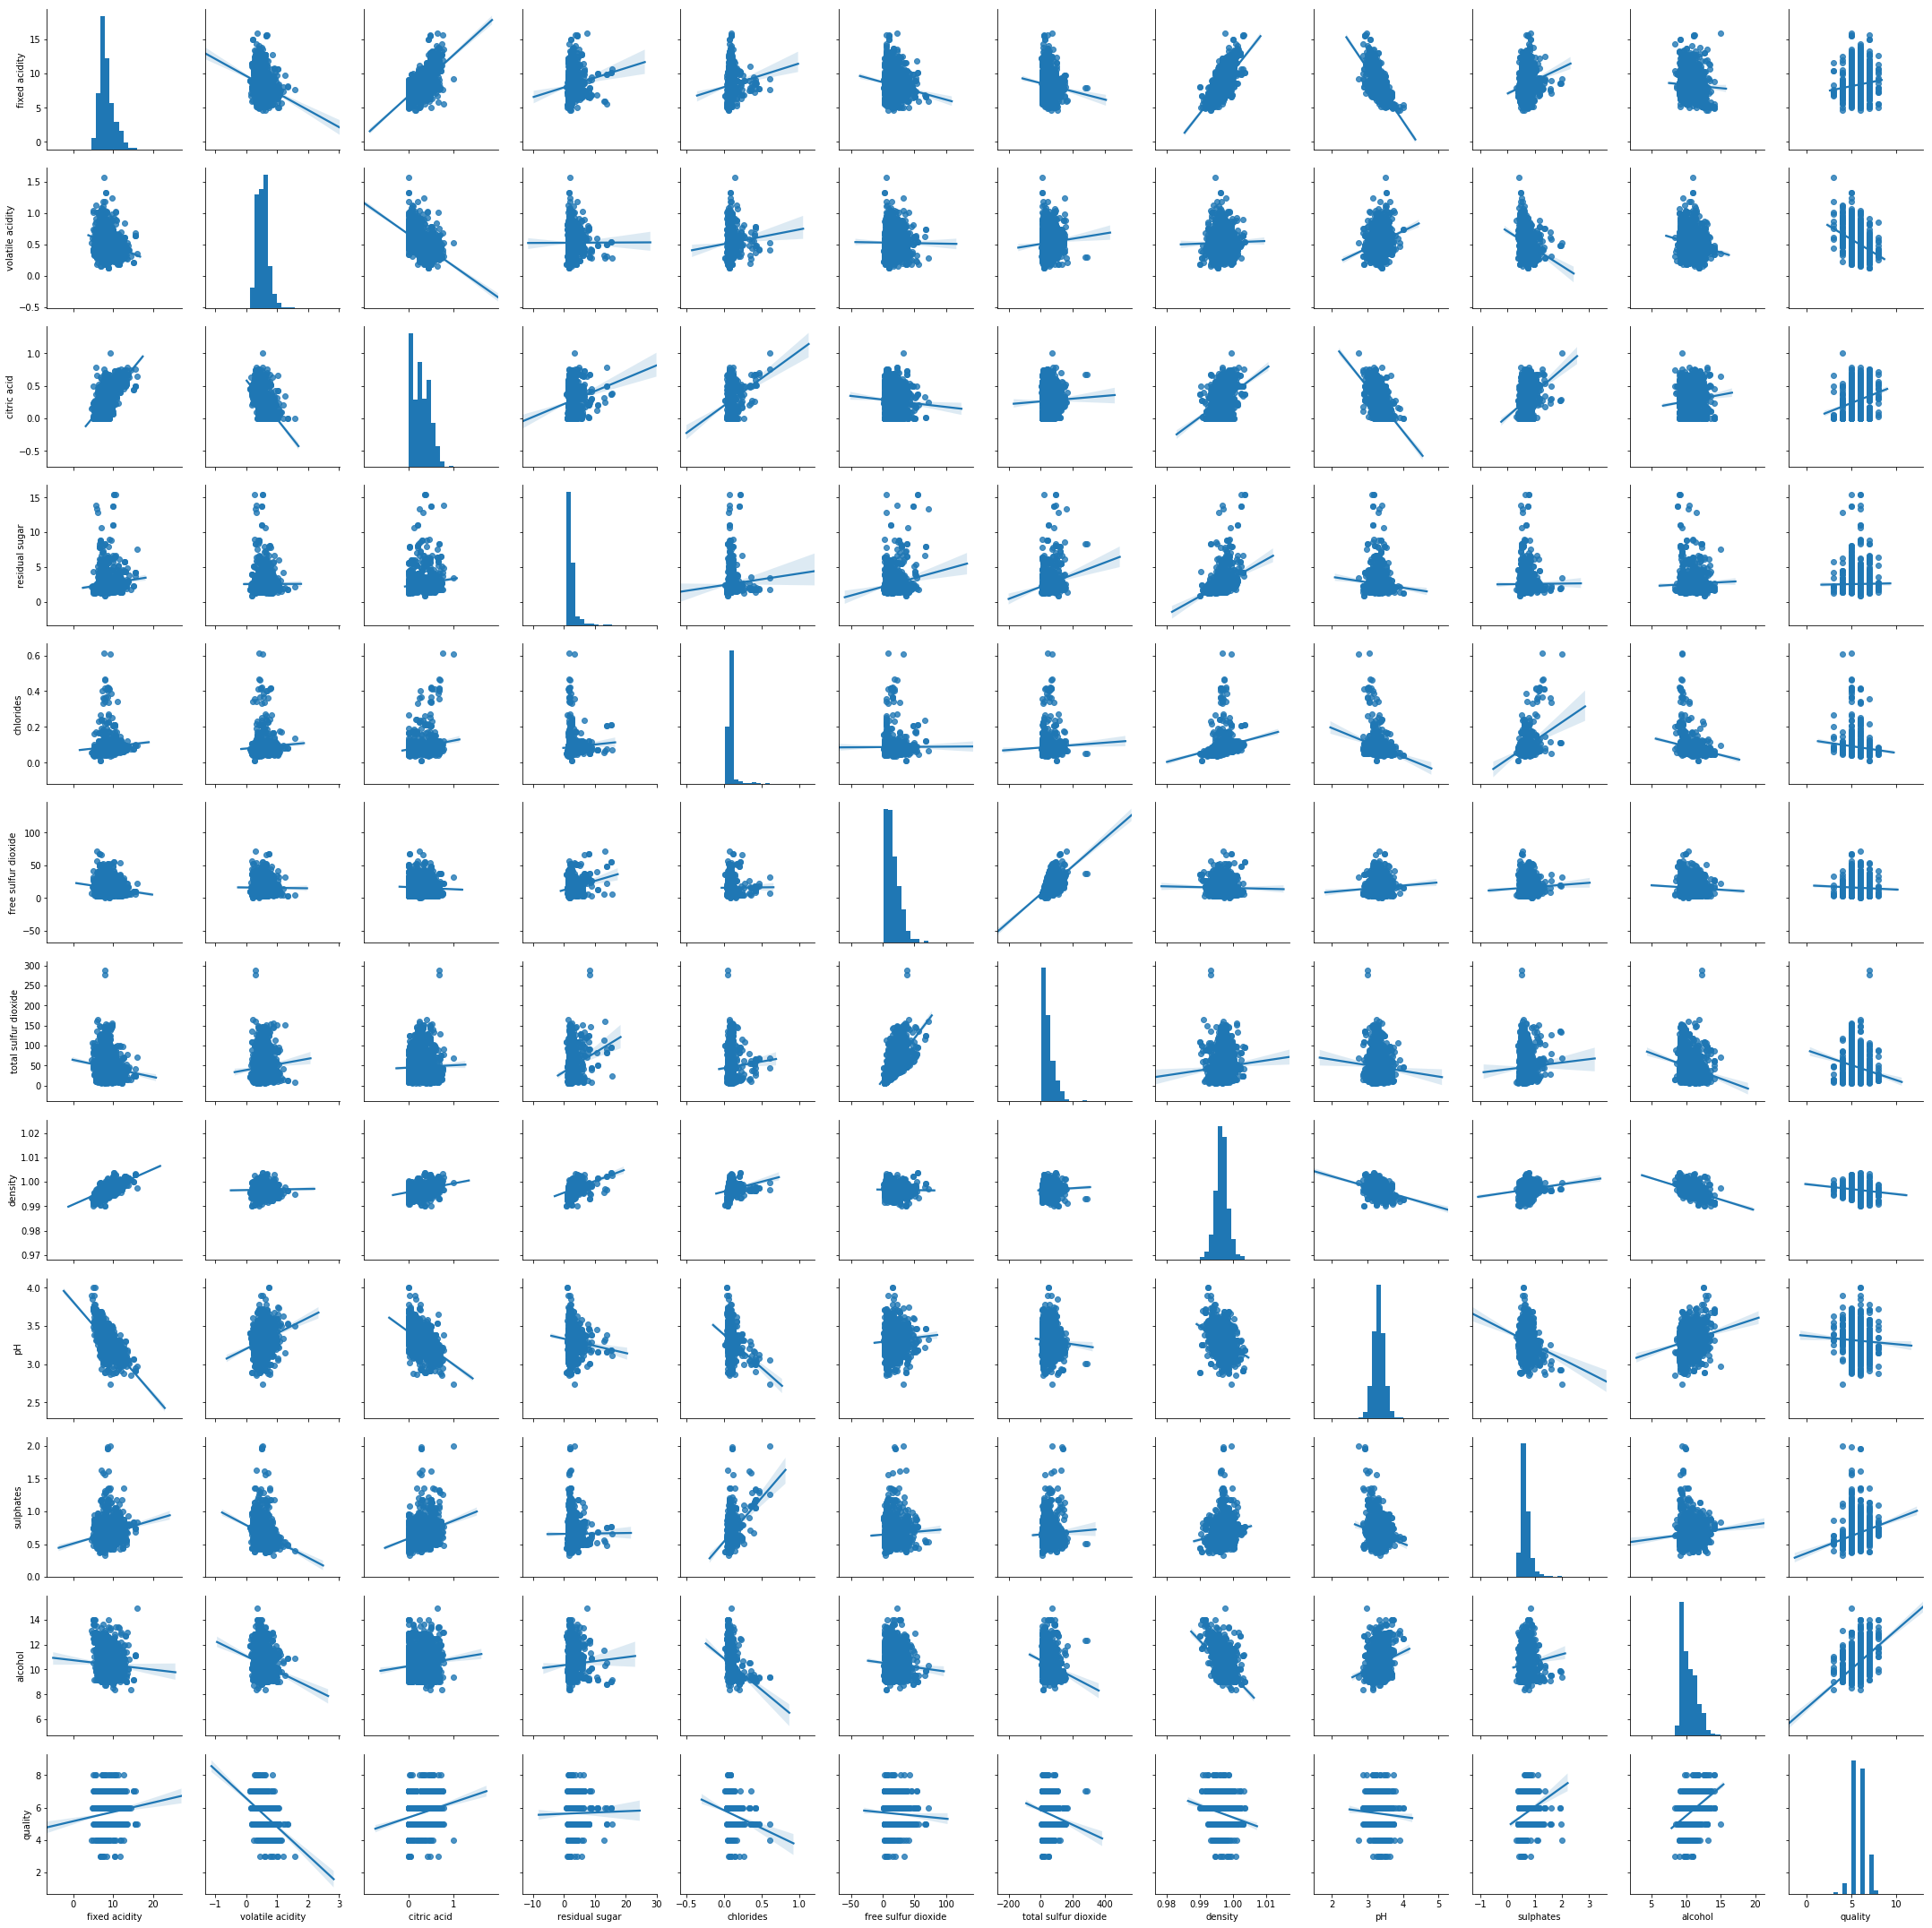

In [3]:
sns.pairplot(df, kind='reg')

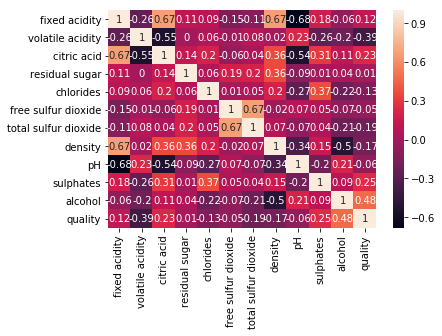

In [5]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [6]:
X=df[['density', 'quality', 'pH']]
y=df['alcohol']

In [7]:
from sklearn.linear_model import LinearRegression

malli=LinearRegression()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
malli.intercept_

225.29473384811655

In [9]:
malli.coef_

array([-220.85438619,    0.54536537,    0.66153999])

In [10]:
malli.score(X,y)

0.4105743865294349

Text(0, 0.5, 'Poikkeama')

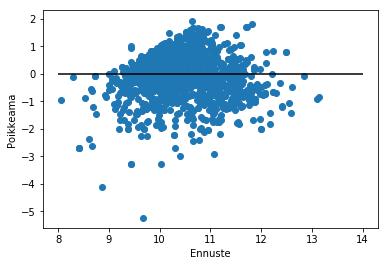

In [17]:
plt.scatter(malli.predict(X), malli.predict(X)-y)
plt.hlines(y=0,xmin=8,xmax=14)
plt.xlabel('Ennuste')
plt.ylabel('Poikkeama')

Text(0, 0.5, 'Ennuste')

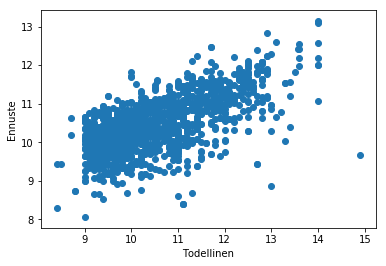

In [16]:
plt.scatter(df['alcohol'], malli.predict(X))

plt.xlabel('Todellinen')
plt.ylabel('Ennuste')